**Input Data:** There are two files in this folder, training_set and test_set.
- Training Set: Contains almost one year of historical electricity price data presented through multiple features from column B:L. The target column contains electricity prices per hour.
- Test Set: Contains all features for four days and the target value is not given.


The goal is designing two AI models, **one deep model** and **one ensemble model**, based on training data and predicting target values during the test set.
Feel free to:
1. Create new features and add it to the data set or remove existing ones from the data set.
2. Create the internal model architecture, parameters and fine-tuning process.


What you need to deliver:
1. In a word document, describe in your own words and in detail the data exploration and feature engineering steps and methods that you used.
2. In the same word document, describe in your own words and in detail the model selection, design, and fine-tuning process that you used.
3. Verify your data and submit an excel containing the forecasted values for the test data sets.
4. Submit one or more, .py/.m file(s), for each step.

In [3]:
# import libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df = pd.read_excel('Training Set.xlsx')
test_df = pd.read_excel("Test Set.xlsx")

In [5]:
train_df.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75


In [6]:
train_df.shape

(7584, 13)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 7584 non-null   datetime64[ns]
 1   Hour                 7584 non-null   int64         
 2   Weekday              7584 non-null   int64         
 3   Is Working Day       7584 non-null   int64         
 4   Previous Hour Price  7584 non-null   float64       
 5   SDSH DAP             7584 non-null   float64       
 6   SDSH Volume          7584 non-null   float64       
 7   Sgn0 VolumeDir       7584 non-null   float64       
 8   P24HA Price          7584 non-null   float64       
 9   PDSH Price           7584 non-null   float64       
 10  PWSH Price           7584 non-null   float64       
 11  PWA Price            7584 non-null   float64       
 12  target               7584 non-null   float64       
dtypes: datetime64[ns](1), float64(9),

In [8]:
test_df.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN


In [9]:
test_df.shape

(96, 13)

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 96 non-null     datetime64[ns]
 1   Hour                 96 non-null     int64         
 2   Weekday              96 non-null     int64         
 3   Is Working Day       96 non-null     int64         
 4   Previous Hour Price  96 non-null     float64       
 5   SDSH DAP             96 non-null     float64       
 6   SDSH Volume          96 non-null     float64       
 7   Sgn0 VolumeDir       96 non-null     float64       
 8   P24HA Price          96 non-null     float64       
 9   PDSH Price           96 non-null     float64       
 10  PWSH Price           96 non-null     float64       
 11  PWA Price            96 non-null     float64       
 12  target               0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), int

In [11]:
train_df.describe().round(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,7584.00,7584.0,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00
mean,12.50,4.0,4.57,2429.48,2327.52,1587.82,0.02,2433.18,2426.83,2464.85,2442.33,2429.37
std,6.92,2.0,1.39,1590.72,1419.11,213.11,73.09,1125.33,1564.73,1605.18,870.87,1590.75
min,1.00,1.0,1.00,124.16,87.38,1079.80,-465.20,1145.51,124.16,124.16,1409.44,124.16
25%,6.75,2.0,4.00,1664.40,1651.85,1400.98,-50.42,1722.83,1666.84,1676.70,1813.92,1664.35
50%,12.50,4.0,5.00,1945.81,1922.32,1583.30,-16.20,2029.11,1951.46,1967.16,2060.33,1945.70
75%,18.25,6.0,5.00,2568.55,2507.29,1757.62,43.30,2725.68,2595.94,2603.57,2823.23,2568.55
max,24.00,7.0,8.00,10117.86,9548.44,2192.30,661.20,7691.48,10117.86,10117.86,5520.09,10117.86


In [12]:
test_df.describe().round(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,0.0
mean,12.50,4.75,4.00,1550.60,1549.67,1638.72,-1.76,1584.22,1520.71,1358.63,1546.61,NaN
std,6.96,2.29,1.23,260.32,241.88,209.62,77.61,83.06,367.22,512.76,41.11,NaN
min,1.00,1.00,2.00,1204.60,1225.07,1303.10,-120.40,1395.11,184.18,182.17,1458.82,NaN
25%,6.75,4.00,3.50,1357.13,1393.89,1447.88,-50.23,1515.97,1378.53,1214.70,1502.39,NaN
50%,12.50,5.50,4.50,1493.88,1509.78,1588.10,-24.15,1626.19,1483.94,1472.90,1554.20,NaN
75%,18.25,6.25,5.00,1566.80,1598.56,1822.40,19.70,1645.19,1579.28,1539.01,1584.21,NaN
max,24.00,7.00,5.00,2311.63,2372.21,2025.70,260.60,1668.11,2311.19,2957.65,1591.16,NaN


### Neural Network

In [13]:
# Separate dependent(target) variable and independent variables
X = train_df.drop(['Date','target'], axis = 1)
y = train_df['target']

In [14]:
from sklearn.model_selection import train_test_split

# Perform train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 


X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [18]:
model_1 = Sequential()

model_1.add(Dense(11,activation='relu'))
model_1.add(Dense(11,activation='relu'))
model_1.add(Dense(11,activation='relu'))
model_1.add(Dense(11,activation='relu'))
model_1.add(Dense(1))

model_1.compile(optimizer='adam',loss='mse')

In [20]:
model_1.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=400)

Epoch 1/400
48/48 [==============================] - 7s 13ms/step - loss: 8360192.0000 - val_loss: 8714602.0000
Epoch 2/400
48/48 [==============================] - 0s 3ms/step - loss: 8354303.5000 - val_loss: 8702221.0000
Epoch 3/400
48/48 [==============================] - 0s 2ms/step - loss: 8320419.5000 - val_loss: 8626303.0000
Epoch 4/400
48/48 [==============================] - 0s 2ms/step - loss: 8154739.5000 - val_loss: 8298212.5000
Epoch 5/400
48/48 [==============================] - 0s 2ms/step - loss: 7536673.0000 - val_loss: 7222386.0000
Epoch 6/400
48/48 [==============================] - 0s 3ms/step - loss: 5882600.5000 - val_loss: 4779290.0000
Epoch 7/400
48/48 [==============================] - 0s 2ms/step - loss: 3244601.5000 - val_loss: 2156465.5000
Epoch 8/400
48/48 [==============================] - 0s 2ms/step - loss: 1625597.7500 - val_loss: 1396800.2500
Epoch 9/400
48/48 [==============================] - 0s 2ms/step - loss: 1251651.2500 - val_loss: 1184780.6250


<AxesSubplot:>

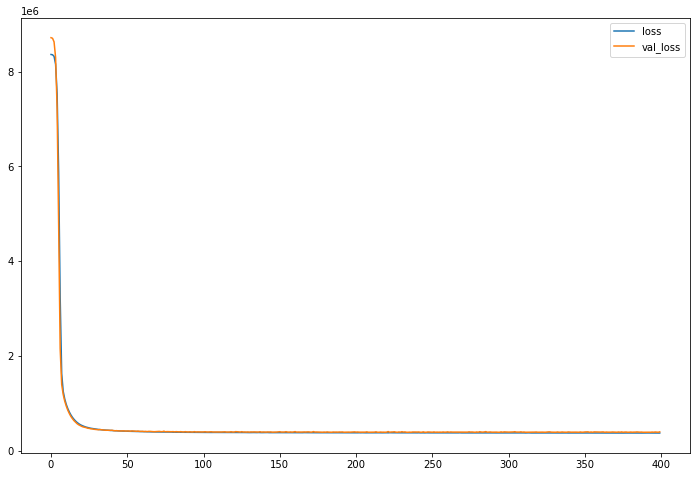

In [21]:
loss_df = pd.DataFrame(model_1.history.history)
loss_df.plot(figsize=(12,8))

In [45]:
y_pred_val_1 = model_1.predict(X_val)

In [46]:
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val_1[:,0]})
result_df

,Actual,Prediction
0,10117.855409,9036.193359
1,1639.210000,1602.616943
2,1635.910000,1666.686768
3,2466.700000,2195.412598
4,2429.080000,2215.903076
...,...,...
1512,1827.380000,1774.952515
1513,1498.002000,1512.588135
1514,1813.550000,1640.936768
1515,4258.560000,3245.320801


## On test unseen data

In [36]:
test = test_df.copy()
test = test.drop({'Date','target'},axis=1)
test = scaler.fit_transform(test)

In [37]:
y_pred__test_1 = model_1.predict(test)

In [38]:
y_pred__test_1

array([[2126.2188 ],
       [2048.9102 ],
       [1631.6644 ],
       [1521.9271 ],
       [1255.9165 ],
       [1301.6008 ],
       [1589.8325 ],
       [2030.9983 ],
       [3370.0906 ],
       [4685.797  ],
       [6782.8076 ],
       [3874.034  ],
       [3231.358  ],
       [4995.213  ],
       [5583.2344 ],
       [4165.3564 ],
       [3051.6108 ],
       [4692.835  ],
       [3590.0137 ],
       [2106.7354 ],
       [2081.452  ],
       [3407.4465 ],
       [3884.3062 ],
       [2371.6536 ],
       [2756.5142 ],
       [2249.1655 ],
       [2126.0742 ],
       [2091.737  ],
       [1814.5557 ],
       [1402.5825 ],
       [1474.8855 ],
       [1588.9021 ],
       [2219.3667 ],
       [1817.3943 ],
       [2710.8887 ],
       [2832.8674 ],
       [2418.1404 ],
       [3200.9768 ],
       [4423.9697 ],
       [3839.9556 ],
       [2937.6924 ],
       [3980.9995 ],
       [3838.868  ],
       [2910.626  ],
       [3506.3718 ],
       [3912.6887 ],
       [5129.373  ],
       [2803.

In [39]:
model_2 = Sequential()

model_2.add(Dense(11,activation='relu'))
model_2.add(Dense(11,activation='relu'))
model_2.add(Dense(11,activation='relu'))
model_2.add(Dense(11,activation='relu'))
model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [40]:
model_2.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=150)

Epoch 1/150
48/48 [==============================] - 1s 9ms/step - loss: 8357817.5000 - val_loss: 8709863.0000
Epoch 2/150
48/48 [==============================] - 0s 3ms/step - loss: 8341126.5000 - val_loss: 8672846.0000
Epoch 3/150
48/48 [==============================] - 0s 3ms/step - loss: 8255094.5000 - val_loss: 8496692.0000
Epoch 4/150
48/48 [==============================] - 0s 3ms/step - loss: 7912468.0000 - val_loss: 7871209.0000
Epoch 5/150
48/48 [==============================] - 0s 3ms/step - loss: 6863870.0000 - val_loss: 6153941.5000
Epoch 6/150
48/48 [==============================] - 0s 3ms/step - loss: 4596933.5000 - val_loss: 3206832.7500
Epoch 7/150
48/48 [==============================] - 0s 3ms/step - loss: 1969835.0000 - val_loss: 1223160.7500
Epoch 8/150
48/48 [==============================] - 0s 3ms/step - loss: 1001184.7500 - val_loss: 895010.9375
Epoch 9/150
48/48 [==============================] - 0s 3ms/step - loss: 829968.6875 - val_loss: 786209.1875
Epoc

<AxesSubplot:>

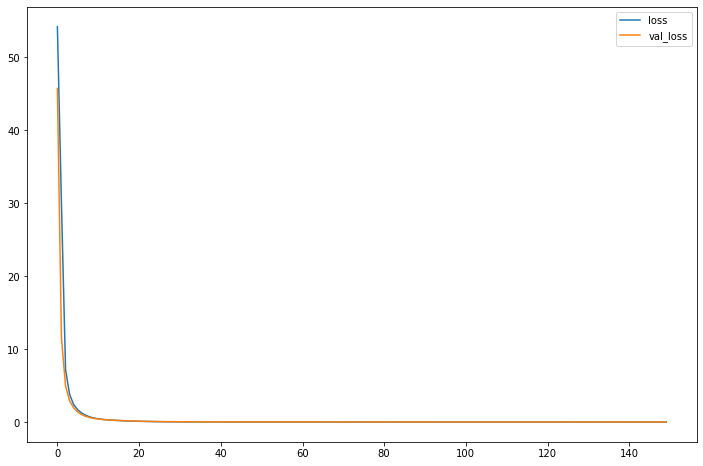

In [166]:
loss_df = pd.DataFrame(model_2.history.history)
loss_df.plot(figsize=(12,8))

In [41]:
y_pred_val_2 = model_2.predict(X_val)
result_df = pd.DataFrame({'Actual':np.array(y_val), 'Prediction':y_pred_val_2[:,0]})
result_df

,Actual,Prediction
0,10117.855409,9339.008789
1,1639.210000,1600.815918
2,1635.910000,1666.546387
3,2466.700000,2200.813965
4,2429.080000,2243.544434
...,...,...
1512,1827.380000,1816.679199
1513,1498.002000,1458.864136
1514,1813.550000,1664.509277
1515,4258.560000,3391.625488


In [43]:
y_pred_test_2 = model_2.predict(test)
y_pred_test_2

array([[2294.5195 ],
       [2102.006  ],
       [1758.1958 ],
       [1660.6056 ],
       [1351.677  ],
       [1390.5762 ],
       [1639.597  ],
       [2034.1116 ],
       [3343.354  ],
       [4712.4087 ],
       [6705.5513 ],
       [3820.0266 ],
       [3220.7886 ],
       [4958.5303 ],
       [5423.311  ],
       [4071.9377 ],
       [2954.1047 ],
       [4765.1235 ],
       [3480.764  ],
       [2060.3623 ],
       [2090.3547 ],
       [3282.9258 ],
       [3637.8806 ],
       [2329.0784 ],
       [2873.2666 ],
       [2424.449  ],
       [2278.6387 ],
       [2234.0784 ],
       [1933.095  ],
       [1571.7375 ],
       [1641.5013 ],
       [1615.3978 ],
       [2185.0725 ],
       [1890.319  ],
       [2702.4514 ],
       [2839.001  ],
       [2408.3547 ],
       [3220.6765 ],
       [4416.4614 ],
       [3882.8425 ],
       [2889.012  ],
       [4096.739  ],
       [3810.548  ],
       [2862.146  ],
       [3552.719  ],
       [3957.1326 ],
       [5101.819  ],
       [2644.

In [47]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_val, y_pred_val_1)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_val, y_pred_val_1)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val_1))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_val,y_pred_val_1)))

Mean Absolute Error: 286.73
Mean Squared Error: 397996.98
Root Mean Squared Error: 630.87
Variance score is: 0.85


In [48]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_val, y_pred_val_2)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_val, y_pred_val_2)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val_2))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_val,y_pred_val_2)))

Mean Absolute Error: 289.62
Mean Squared Error: 397532.51
Root Mean Squared Error: 630.50
Variance score is: 0.85


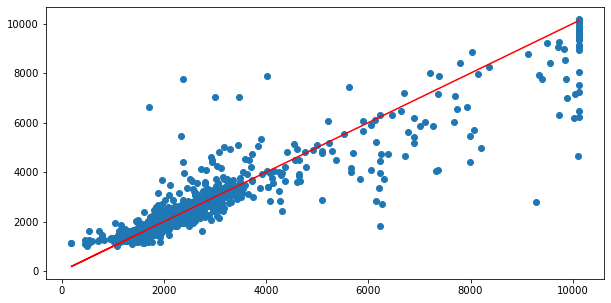

In [49]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_val,y_pred_val_1)
# Perfect predictions
plt.plot(y_val,y_val,'r')

<AxesSubplot:xlabel='target', ylabel='Density'>

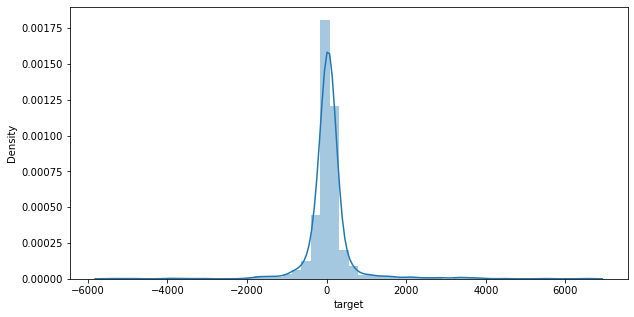

In [50]:
fig = plt.figure(figsize=(10,5))
residuals = (y_val - y_pred_val_1[:,0])
sns.distplot(residuals)

In [52]:
print('Model: Keras Regression')
print('*********************************\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_val, y_pred_val_1)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_val, y_pred_val_1)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val_1))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_val,y_pred_val_1)*100))

Model: Keras Regression
*********************************

Mean Absolute Error(MAE): 286.73
Mean Squared Error(MSE): 397996.98
Root Mean Squared Error(RMSE): 630.87
Variance score: 85.26



### Another Try

In [53]:
from keras.models import Sequential
from keras.layers import Dense

In [54]:
model_3 = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='relu'),
])

In [55]:
model_3.compile(optimizer='adam',
              loss='mse')

In [56]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


In [57]:
hist = model_3.fit(x=X_train,y=y_train,
          batch_size=128, epochs=150,
          validation_data=(X_val,y_val))

Epoch 1/150
48/48 [==============================] - 36s 22ms/step - loss: 8378045.4082 - val_loss: 8696202.0000
Epoch 2/150
48/48 [==============================] - 0s 3ms/step - loss: 8726868.9286 - val_loss: 8464397.0000
Epoch 3/150
48/48 [==============================] - 0s 3ms/step - loss: 8273619.5714 - val_loss: 7214232.00009
Epoch 4/150
48/48 [==============================] - 0s 3ms/step - loss: 6002656.2143 - val_loss: 4016362.0000
Epoch 5/150
48/48 [==============================] - 0s 3ms/step - loss: 2980058.5918 - val_loss: 1471427.6250
Epoch 6/150
48/48 [==============================] - 0s 3ms/step - loss: 1252936.2296 - val_loss: 964826.9375
Epoch 7/150
48/48 [==============================] - 0s 3ms/step - loss: 895642.6250 - val_loss: 778294.5625
Epoch 8/150
48/48 [==============================] - 0s 3ms/step - loss: 699704.0612 - val_loss: 680263.4375
Epoch 9/150
48/48 [==============================] - 0s 3ms/step - loss: 629765.9477 - val_loss: 614683.3750
Epoch

In [58]:
model_3.evaluate(X_val, y_val)

48/48 [==============================] - 0s 957us/step - loss: 389775.9375


389775.9375

## Visualizing Loss and Accuracy

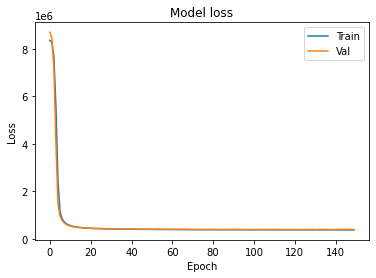

In [59]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [60]:
from keras.layers import Dropout
from keras import regularizers

In [75]:
model_4 = Sequential([
    Dense(100, activation='relu', input_shape=(11,)),
    Dropout(0.1),
    Dense(100, activation='relu'),
    Dropout(0.1),
    Dense(100, activation='relu'),
    Dropout(0.1),
    Dense(100, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='relu'),
])

In [76]:
model_4.compile(optimizer='adam',
              loss='mse')
hist_2 = model_4.fit(X_train, y_train,
          batch_size=128, epochs=150,
          validation_data=(X_val, y_val))

Epoch 1/150
48/48 [==============================] - 3s 20ms/step - loss: 8408805.3980 - val_loss: 7387618.0000
Epoch 2/150
48/48 [==============================] - 0s 8ms/step - loss: 4681152.0102 - val_loss: 770560.5000
Epoch 3/150
48/48 [==============================] - 0s 8ms/step - loss: 691934.9515 - val_loss: 570626.9375
Epoch 4/150
48/48 [==============================] - 0s 8ms/step - loss: 621636.5006 - val_loss: 497824.5625
Epoch 5/150
48/48 [==============================] - 0s 7ms/step - loss: 567385.6129 - val_loss: 483918.7812
Epoch 6/150
48/48 [==============================] - 0s 8ms/step - loss: 539516.6550 - val_loss: 481160.5312
Epoch 7/150
48/48 [==============================] - 0s 9ms/step - loss: 509367.8935 - val_loss: 448387.6250
Epoch 8/150
48/48 [==============================] - 0s 9ms/step - loss: 540031.7864 - val_loss: 441624.3438
Epoch 9/150
48/48 [==============================] - 0s 8ms/step - loss: 519222.6620 - val_loss: 431350.9375
Epoch 10/150
48

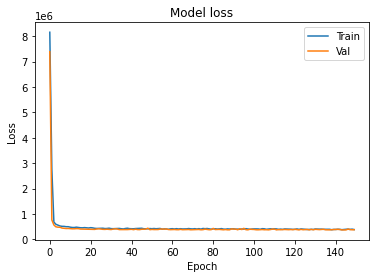

In [77]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
# plt.ylim(top=1.2, bottom=0)
plt.show()